In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the data into a dataframe
df = pd.read_excel('data.xlsx', sheet_name='Assignment-2')

In [3]:
# converting the df into its transpose
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
SKU,2527,3042,3086,3155,3166,8272,9311,13159,13160,14011,...,PPAM05126,PPAM05156,PPAM06156,PPAM07156,PPAM08156,PPAM11156,PSTM01257,PSTM01457,WIM5011B,WIM51234
2019-08-01 00:00:00,1551,2240,891,1628,369,1034,597,57,49,6,...,29,28,15,79,93,2,22,14,92,2
2019-08-02 00:00:00,1613,2330,909,1628,354,1024,585,56,48,6,...,28,27,15,79,93,2,23,13,92,2
2019-08-03 00:00:00,1613,2423,936,1563,343,1055,608,57,48,6,...,29,28,15,75,89,2,24,12,91,2
2019-08-04 00:00:00,1532,2350,889,1532,340,1055,578,60,48,6,...,28,27,15,77,85,2,25,11,93,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27 00:00:00,1926,6606,772,2030,319,690,215,34,35,6,...,11,35,11,82,171,2,24,15,27,2
2020-07-28 00:00:00,1926,6804,811,2050,329,669,224,34,33,6,...,11,34,11,83,174,2,25,16,27,2
2020-07-29 00:00:00,1849,6872,803,2132,336,649,228,33,34,6,...,11,33,11,79,174,2,25,16,27,2
2020-07-30 00:00:00,1904,6872,763,2111,349,649,228,32,32,6,...,11,32,11,80,174,2,24,16,26,2


In [4]:
# converting the SKU into columns
df.columns = df.iloc[0]

# droping the SKU from the rows
df.drop(index='SKU' ,inplace=True)

In [5]:
# converting the index into datetime
df.index = pd.DatetimeIndex(df.index)

In [6]:
df.index

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
               '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
               '2019-08-09', '2019-08-10',
               ...
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', length=366, freq=None)

## 1) What is the monthly and quaterly sales data?

In [7]:
# calculating quaterly sales 
q_df = df.resample('Q').sum()
quaterly_df = q_df.sum(axis=1).reset_index()
quaterly_df.rename(columns={'index': 'Months',0: 'Sales(sum)'}, inplace=True)
quaterly_df

,Months,Sales(sum)
0,2019-09-30,33899535
1,2019-12-31,55790393
2,2020-03-31,57378126
3,2020-06-30,55962950
4,2020-09-30,18795771


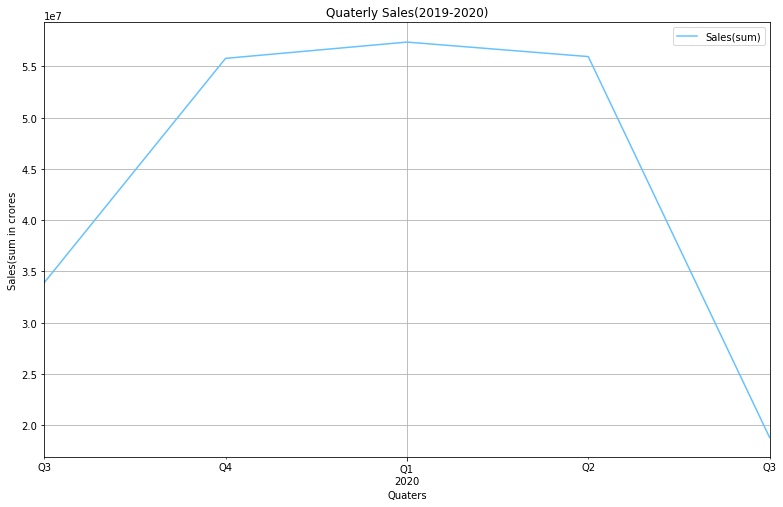

In [8]:
quaterly_df.plot(kind='line', 
           x= 'Months',
           y='Sales(sum)',
           color = '#66c2ff', 
           figsize =(13,8), 
           title = "Quaterly Sales(2019-2020)");
plt.xlabel('Quaters');
plt.xticks(rotation=360)
plt.grid(True)
plt.ylabel('Sales(sum in crores');

In [9]:
# calculating monthly sales 
m_df = df.resample('M').sum()
monthly_df = m_df.sum(axis=1).reset_index()
monthly_df.rename(columns={'index': 'Months', 0: 'Sales(sum)'}, inplace=True)
monthly_df

,Months,Sales(sum)
0,2019-08-31,16590204
1,2019-09-30,17309331
2,2019-10-31,18300108
3,2019-11-30,17954015
4,2019-12-31,19536270
5,2020-01-31,19170099
6,2020-02-29,17973457
7,2020-03-31,20234570
8,2020-04-30,19103472
9,2020-05-31,18555947


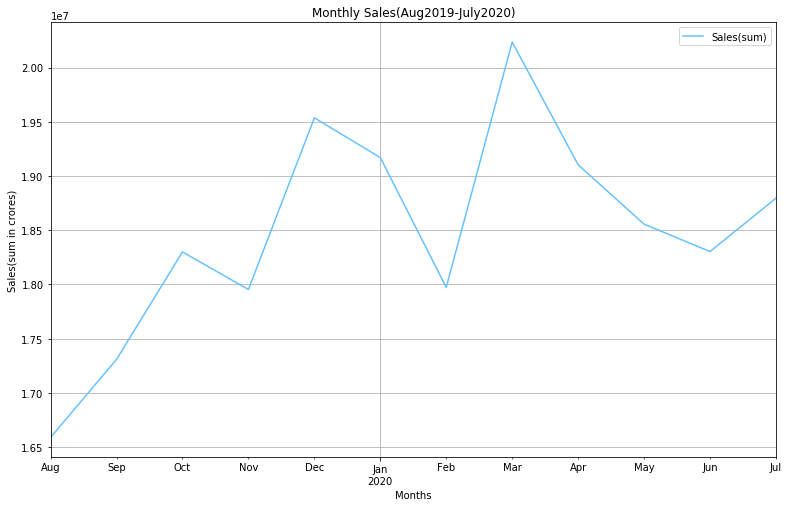

In [10]:
monthly_df.plot(kind='line', 
           x= 'Months',
           y='Sales(sum)',
           color = '#66c2ff', 
           figsize =(13,8), 
           title = "Monthly Sales(Aug2019-July2020)");
plt.xlabel('Months');
plt.ylabel('Sales(sum in crores)');
plt.grid(True)

## 2) Which are the top 3 months in terms of overall sales?

In [11]:
# sorting the monthly sales dataframe
monthly_df.sort_values(by='Sales(sum)', ascending=False)

,Months,Sales(sum)
7,2020-03-31,20234570
4,2019-12-31,19536270
5,2020-01-31,19170099
8,2020-04-30,19103472
11,2020-07-31,18795771
9,2020-05-31,18555947
10,2020-06-30,18303531
2,2019-10-31,18300108
6,2020-02-29,17973457
3,2019-11-30,17954015


## 3) Which SKUs are outliers in term sales in any month?

In [12]:
# calculating monthly sales(sum)
outliers_df=df.resample('M').sum().iloc[1].reset_index()
outliers_df

,SKU,2019-09-30 00:00:00
0,2527,36880
1,3042,62415
2,3086,31687
3,3155,41922
4,3166,10306
...,...,...
242,PPAM11156,60
243,PSTM01257,772
244,PSTM01457,305
245,WIM5011B,2447


In [14]:
outliers=[]
thredshold=3
# calculating mean and standard deviation
mean = np.mean(outliers_df.iloc[:,1])
std = np.std(outliers_df.iloc[:,1])

# calculating the z score and appending the outliers to the outliers list
for i in outliers_df.iloc[:,1]:
    z = (i - mean)/std
    if np.abs(z) > thredshold:
        outliers.append(i)
outliers

[1213504, 3361132, 952962]

In [15]:
# filtering outliers from the dataframe
outliers_df[outliers_df.iloc[:,1].isin(outliers)]

,SKU,2019-09-30 00:00:00
14,14119,1213504
74,65001,3361132
78,65202,952962
